In [1]:
import numpy as np
import pandas as pd
import sys
from iminuit import Minuit

In [2]:
sys.path.append("../../../") #Sorry about this one /Asbjørn
import myfuncs as my
#my.init_plotting()
save = my.plot_saving("../Report/figures/",save=True).saveplot

In [3]:
output_data = pd.read_csv("2024_03_14_collected_large_scan.txt",sep="\\s+")


In [4]:
#output_data.sort_values(by=["Version","N_gangs"])
small = output_data.loc[output_data["VERSION"]==0]
medium = output_data.loc[output_data["VERSION"]==1]

In [5]:
small

,Check,Size,NLON,NLAT,TIME,VERSION
0,22504300.0,1,1,1,1.48813,0
1,22504300.0,1,1,1,1.49250,0
2,22504300.0,1,1,1,1.49111,0
3,22504300.0,1,1,1,1.48826,0
4,22504300.0,1,1,1,1.48332,0
...,...,...,...,...,...,...
5028,22504300.0,200,20,10,2.08913,0
5029,22504300.0,200,20,10,2.26201,0
5030,22504300.0,200,20,10,2.24566,0
5031,22504300.0,200,20,10,2.09023,0


In [16]:
def get_time_errors(small):
    small_time = []
    small_size = []
    small_time_err = []
    for size in set(small["Size"].values):
        small_size.append(size)
        small_time.append(np.mean(small[small["Size"] == size]["TIME"]))
        small_time_err.append(np.std(small[small["Size"] == size]["TIME"],ddof=1))
    return small_size,small_time,small_time_err
small_size, small_time, small_time_err = get_time_errors(small)
medium_size, medium_time, medium_time_err = get_time_errors(medium)

In [7]:
import matplotlib.pyplot as plt

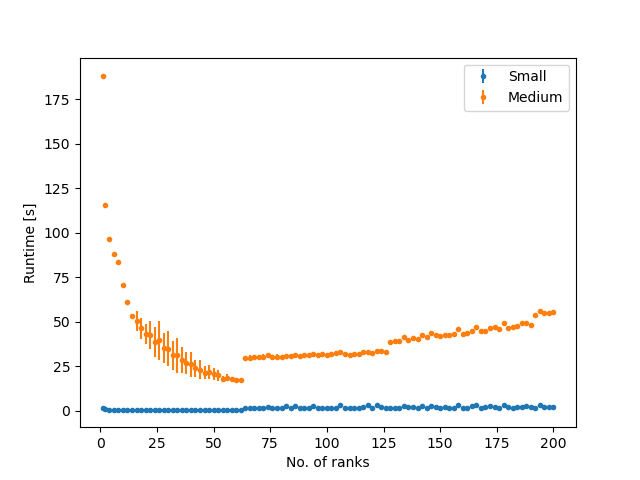

In [17]:
%matplotlib widget
fig, ax = plt.subplots()
ax.errorbar(small_size,small_time,yerr=small_time_err,fmt=".",label="Small")
ax.errorbar(medium_size,medium_time,yerr=medium_time_err,fmt=".",label="Medium")
ax.set(xlabel="No. of ranks", ylabel="Runtime [s]",yscale="log")
ax.legend()

In [10]:
def amdahl(N,a,s):
    return a/(s+(1-s)/N)

def _least_squares(x,y,err,a,s):
    ymod = amdahl(x,a,s)
    return np.sum((ymod-y)**2/err**2)

def least_squares_v(v):
    return lambda a,s: _least_squares(gangs, data["Elapsed_time"].max()/data_times,data_err, a ,s)    
    return lambda a,s: _least_squares(data["N_gangs"].to_numpy(), data["Elapsed_time"].max()/data["Elapsed_time"].to_numpy(), a ,s)
Vtimes = np.zeros((4,len(list(set(output_data_Amdahl.grid_size)))))
Verrs = np.zeros((4,len(list(set(output_data_Amdahl.grid_size)))))

v=0
mask = output_data_Amdahl["Version"] == v
data = output_data_Amdahl.where(mask).dropna(axis=0)
size = np.sort(list(set(data.grid_size)))
gangs = 1
data_times = np.zeros(len(size))
data_err = np.zeros(len(size))
for i in range(len(size)):
    data_times[i] = np.mean(data.Elapsed_time[data.grid_size==size[i]])
    data_err[i] =np.std(data.Elapsed_time[data.grid_size==size[i]],ddof=1)
    print(sum(data.grid_size==size[i]))
print(data_times)
print(data_err)
Vtimes[0] = data_times
Verrs[0] = data_err
v0_min = Minuit(least_squares_v(0), a = 1, s = 0.09)
v0_min.limits["a"] = 0.01,None
v0_min.fixed["a"] = False
display(v0_min.migrad())
a0,s0 = v0_min.values[:]

v=1
mask = output_data_Amdahl["Version"] == v
data = output_data_Amdahl.where(mask).dropna(axis=0)
size = np.sort(list(set(data.grid_size)))
gangs = 141
data_times = np.zeros(len(size))
data_err = np.zeros(len(size))
for i in range(len(size)):
    data_times[i] = np.mean(data.Elapsed_time[data.grid_size==size[i]])
    data_err[i] =np.std(data.Elapsed_time[data.grid_size==size[i]],ddof=1)
    print(sum(data.grid_size==size[i]))
print(data_times)
print(data_err)
Vtimes[1] = data_times
Verrs[1] = data_err
v1_min = Minuit(least_squares_v(1), a = 1, s = 0.09)
v1_min.limits["a"] = 0.01,None
v1_min.fixed["a"] = False
display(v1_min.migrad())
a1,s1 = v1_min.values[:]

v=2
mask = output_data_Amdahl["Version"] == v
data = output_data_Amdahl.where(mask).dropna(axis=0)
size = np.sort(list(set(data.grid_size)))
data_times = np.zeros(len(size))
data_err = np.zeros(len(size))
for i in range(len(size)):
    data_times[i] = np.mean(data.Elapsed_time[data.grid_size==size[i]])
    data_err[i] =np.std(data.Elapsed_time[data.grid_size==size[i]],ddof=1)
    print(sum(data.grid_size==size[i]))
print(data_times)
print(data_err)
Vtimes[2] = data_times
Verrs[2] = data_err
v2_min = Minuit(least_squares_v(2), a = 1, s = 0.09)
v2_min.limits["a"] = 0.01,None
v2_min.fixed["a"] = False
display(v2_min.migrad())
a2,s2 = v2_min.values[:]


v=3
mask = output_data_Amdahl["Version"] == v
data = output_data_Amdahl.where(mask).dropna(axis=0)
size = np.sort(list(set(data.grid_size)))
data_times = np.zeros(len(size))
data_err = np.zeros(len(size))
for i in range(len(size)):
    data_times[i] = np.mean(data.Elapsed_time[data.grid_size==size[i]])
    data_err[i] =np.std(data.Elapsed_time[data.grid_size==size[i]],ddof=1)
    print(sum(data.grid_size==size[i]))
print(data_times)
print(data_err)
Vtimes[3] = data_times
Verrs[3] = data_err

v3_min = Minuit(least_squares_v(3), a = 1, s = 0.09)
v3_min.limits["a"] = 0.01,None
v3_min.fixed["a"] = False
display(v3_min.migrad())
a3,s3 = v3_min.values[:]

6
[28.98973333]
[0.2448954]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.033e-22                  │              Nfcn = 131              │
│ EDM = 2.06e-31 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │       Covariance NOT pos. def.       │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  1.0071   │  0.0000   │            │            │  0.01   │         │       │
│ 1 │ s    │   9e-2    │   0e-2    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

174
[15.03192011]
[30.07789661]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.124e-05                  │              Nfcn = 25               │
│ EDM = 1.17e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │     0     │    70     │            │            │  0.01   │         │       │
│ 1 │ s    │     0     │     6     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       s │
├───┼─────────────────┤
│ a │ 3.8e+03     343 │
│ s │     343      31 │
└───┴─────────────────┘

174
[14.69968494]
[30.03683757]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.581e-09                  │              Nfcn = 33               │
│ EDM = 1.58e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │     0     │    60     │            │            │  0.01   │         │       │
│ 1 │ s    │     0     │     5     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       s │
├───┼─────────────────┤
│ a │ 2.9e+03     251 │
│ s │     251    21.8 │
└───┴─────────────────┘

174
[14.70895431]
[30.12973762]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.626e-09                  │              Nfcn = 33               │
│ EDM = 1.63e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │     0     │    60     │            │            │  0.01   │         │       │
│ 1 │ s    │     0     │     5     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        s │
├───┼───────────────────┤
│ a │ 2.91e+03      252 │
│ s │      252     21.9 │
└───┴───────────────────┘

In [12]:
def amdahl(N,a,s):
    return a/(s+(1-s)/N)

def _least_squares(x,y,err,a,s):
    ymod = amdahl(x,a,s)
    return np.sum((ymod-y)**2/err**2)

def least_squares_v(v):
    return lambda a,s: _least_squares(gangs, data["Elapsed_time"].max()/data_times,data_err, a ,s)    
   # return lambda a,s: _least_squares(data["N_gangs"].to_numpy(), data["Elapsed_time"].max()/data["Elapsed_time"].to_numpy(), a ,s)
Vtimes = np.zeros((4,len(list(set(output_data_Amdahl.N_gangs)))-1))
Verrs = np.zeros((4,len(list(set(output_data_Amdahl.N_gangs)))-1))

v=1
mask = output_data_Amdahl["Version"] == v
data = output_data_Amdahl.where(mask).dropna(axis=0)
gangs = np.sort(list(set(data.N_gangs)))
data_times = np.zeros(len(gangs))
data_err = np.zeros(len(gangs))
for i in range(len(gangs)):
    data_times[i] = np.mean(data.Elapsed_time[data.N_gangs==gangs[i]])
    data_err[i] =np.std(data.Elapsed_time[data.N_gangs==gangs[i]],ddof=1)
print(data_times)
print(data_err)
Vtimes[1] = data_times
Verrs[1] = data_err
v1_min = Minuit(least_squares_v(1), a = 1, s = 0.09)
v1_min.limits["a"] = 0.01,None
v1_min.fixed["a"] = False
display(v1_min.migrad())
a1,s1 = v1_min.values[:]

v=2
mask = output_data_Amdahl["Version"] == v
data = output_data_Amdahl.where(mask).dropna(axis=0)
gangs = np.sort(list(set(data.N_gangs)))
data_times = np.zeros(len(gangs))
data_err = np.zeros(len(gangs))
for i in range(len(gangs)):
    data_times[i] = np.mean(data.Elapsed_time[data.N_gangs==gangs[i]])
    data_err[i] =np.std(data.Elapsed_time[data.N_gangs==gangs[i]],ddof=1)
print(data_times)
print(data_err)
Vtimes[2] = data_times
Verrs[2] = data_err
v2_min = Minuit(least_squares_v(2), a = 1, s = 0.09)
v2_min.limits["a"] = 0.01,None
v2_min.fixed["a"] = False
display(v2_min.migrad())
a2,s2 = v2_min.values[:]


v=3
mask = output_data_Amdahl["Version"] == v
data = output_data_Amdahl.where(mask).dropna(axis=0)
gangs = np.sort(list(set(data.N_gangs)))
data_times = np.zeros(len(gangs))
data_err = np.zeros(len(gangs))
for i in range(len(gangs)):
    data_times[i] = np.mean(data.Elapsed_time[data.N_gangs==gangs[i]])
    data_err[i] =np.std(data.Elapsed_time[data.N_gangs==gangs[i]],ddof=1)
print(data_times)
print(data_err)
Vtimes[3] = data_times
Verrs[3] = data_err

v3_min = Minuit(least_squares_v(3), a = 1, s = 0.09)
v3_min.limits["a"] = 0.01,None
v3_min.fixed["a"] = False
display(v3_min.migrad())
a3,s3 = v3_min.values[:]

[170.05533333  32.79258333  19.33011667  14.55601667  11.71896667
  10.00662833   9.13122333   8.06059667   7.49657833   7.125845
   6.905435     6.416475     6.14111167   5.93819      5.85049
   5.66524333   5.56486333   5.44453667   5.39895667   5.24118167
   5.23406667   5.20701667   5.14228      5.06509      5.01878833
  16.39959667  12.03719833  18.80578333  14.17549167]
[0.22641084 0.03754296 0.03755824 0.00959634 0.0962987  0.012918
 0.21762327 0.01135432 0.10673545 0.09144869 0.47758309 0.08804932
 0.0097884  0.0161605  0.26159139 0.02707793 0.01460035 0.00888973
 0.05193339 0.04233653 0.01922041 0.08770667 0.05667901 0.03911908
 0.01261178 5.6132409  7.73649911 0.13645598 7.19073109]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.101e+04                  │              Nfcn = 75               │
│ EDM = 1.77e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  1.0156   │  0.0008   │            │            │  0.01   │         │       │
│ 1 │ s    │ 21.232e-3 │ 0.026e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        s │
├───┼───────────────────┤
│ a │ 5.78e-07  19.4e-9 │
│ s │  19.4e-9 6.79e-10 │
└───┴───────────────────┘

[170.04566667  32.76626667  19.25821667  14.5537      11.61123333
   9.94667833   9.06755167   8.09254      7.429805     7.04732667
   6.68042667   6.36112333   6.14798833   5.95502333   5.74350667
   5.67245333   5.51426167   5.43143333   5.37753167   5.24219667
   5.40756167   5.178555     5.23171833   5.01490167   4.963505
  15.12781667  11.30060167  14.24331667  11.87795667]
[0.29362538 0.06793567 0.01244627 0.09250055 0.02614748 0.01670219
 0.13066763 0.08706493 0.02963227 0.01311231 0.05882557 0.04247629
 0.05308411 0.10033621 0.09177951 0.0971893  0.00984954 0.03977282
 0.09333395 0.1022148  0.32281412 0.08760694 0.36566545 0.01220544
 0.00767236 0.03904077 4.87708582 2.34956279 5.32147546]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.645e+05                  │              Nfcn = 70               │
│ EDM = 1.37e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.069   │   0.001   │            │            │  0.01   │         │       │
│ 1 │ s    │ 23.349e-3 │ 0.031e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        s │
├───┼───────────────────┤
│ a │  9.6e-07  30.3e-9 │
│ s │  30.3e-9 9.84e-10 │
└───┴───────────────────┘

[170.4465      33.25106667  19.51235     14.7213      11.84885
  10.07883333   9.10807333   8.14580333   7.65469      7.15229667
   6.70661833   6.36744167   6.11907833   5.93438833   5.74887167
   5.66324833   5.57992833   5.46295667   5.35992      5.247125
   5.31962167   5.18524667   5.096655     5.25790333   4.97794667
  15.1721      10.00271     13.53098167  11.90717   ]
[0.18031722 0.04166047 0.06156346 0.08690848 0.01019858 0.03017314
 0.03726682 0.08676158 0.40748768 0.08159053 0.05125547 0.0141632
 0.02851129 0.0480407  0.08295322 0.07662132 0.09709866 0.03907248
 0.03696393 0.0941609  0.1342434  0.08963921 0.05470644 0.57298723
 0.01266638 0.15915291 5.5742551  4.18616437 5.22626338]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.853e+04                  │              Nfcn = 71               │
│ EDM = 6.05e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 996.4e-3  │  1.0e-3   │            │            │  0.01   │         │       │
│ 1 │ s    │ 20.721e-3 │ 0.034e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        s │
├───┼───────────────────┤
│ a │ 9.65e-07  32.0e-9 │
│ s │  32.0e-9 1.12e-09 │
└───┴───────────────────┘

In [11]:
least_squares_v(1)(0.04,0.07)

0.1354963271524315

In [5]:
import matplotlib.pyplot as plt

In [8]:
for d in my.cc+my.mc:
    print(d)

{'color': '#f76462', 'marker': 'o'}
{'color': '#f40b1e', 'marker': '^'}
{'color': '#459da1', 'marker': 's'}
{'color': '#1762df', 'marker': 'H'}
{'color': '#002e7b', 'marker': 'D'}
{'color': '#9f80ec', 'marker': '*'}
{'color': '#0b000c', 'marker': '>'}
{'color': '#540212', 'marker': 'p'}


In [17]:
output_data_Amdahl.where(output_data_Amdahl["version"] == 3)

,Wave_zero_point,coeff_1,coeff_2,coeff_3,coeff_4,t_fft,t_no_fft,t_total,nfreq,nthreads,version,checksum
0,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.323,1.0180,2.341,1048576.0,22.0,3.0,23.291276
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.345,0.8527,2.198,1048576.0,26.0,3.0,23.291276
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.299,1.2480,2.547,1048576.0,18.0,3.0,23.291276
...,...,...,...,...,...,...,...,...,...,...,...,...
7690,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.352,0.6308,1.983,1048576.0,36.0,3.0,23.291276
7691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7692,-1.199000e-09,-0.014087,-0.017407,-0.019272,-0.019317,1.340,5.5150,6.854,1048576.0,4.0,3.0,23.291276
7693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_15973/164755617.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(output_data_Amdahl.N_gangs,output_data_Amdahl.Elapsed_time,'.')


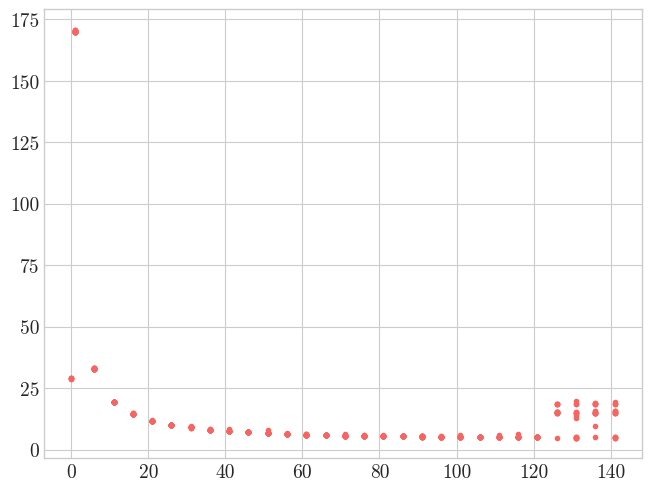

In [30]:
plt.plot(output_data_Amdahl.N_gangs,output_data_Amdahl.Elapsed_time,'.')

/home/jovyan/work/HPPC/HPPC_repo/Assignment_5_shallow_water/Code/../../Assignment_4_Inverse_problems/Code/myfuncs.py:276: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(*dim,figsize=size,**kwargs)
/tmp/ipykernel_182/1119598126.py:11: RuntimeWarning: divide by zero encountered in divide
  data_points,*_ = ax.errorbar(gangs,time.max()/Vtimes[i],yerr = Verrs[i],fmt=markers[i],


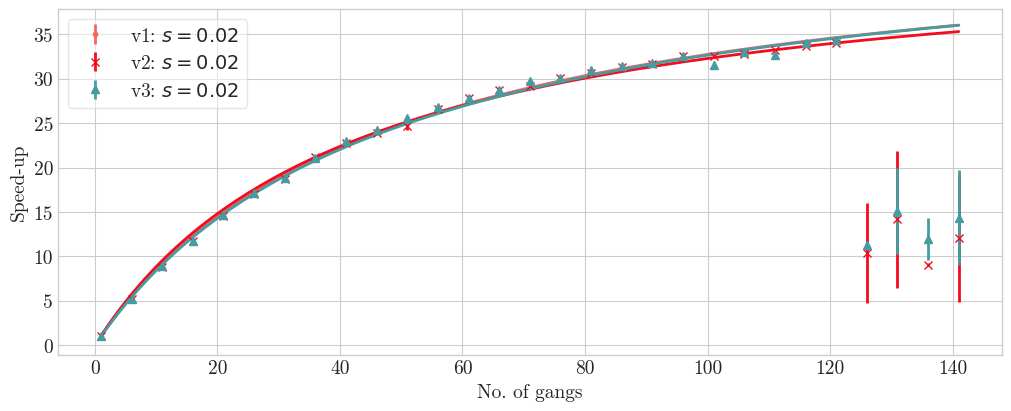

In [13]:
fig, ax = my.standard_plot()
markers = [".","x","^"]
changes = ['v1','v2','v3']#["Propagator", "FFT", "IFFT"]
fit_pars = [[a1,s1],[a2,s2],[a3,s3]]
Ns = np.arange(1,142)
for i in range(3):
    version = i+1
    data = output_data_Amdahl.where(output_data_Amdahl["Version"] == version)
    time = data["Elapsed_time"]
    #data_points, = ax.plot(data["nthreads"], time.max()/time, markers[i],
    data_points,*_ = ax.errorbar(gangs,time.max()/Vtimes[i],yerr = Verrs[i],fmt=markers[i],
                    label=f"{changes[i]}: $s={fit_pars[i][1]:.2f}$")
    ax.plot(Ns,amdahl(Ns,*fit_pars[i]),color = data_points.get_color())
    
ax.set(xlabel="No. of gangs", ylabel="Speed-up")
ax.legend() 
save(fig, "amdahl.pdf")

In [36]:
output_data

,Version,Checksum,Elapsed_time,grid_size,N_gangs,vec_length
0,0,16471.0,1.61559,1024,0,0
1,1,16471.0,3.33008,1024,141,128
2,2,16471.0,3.07562,1024,141,128
3,3,16471.0,3.09078,1024,141,128
4,0,16471.0,1.60584,1024,0,0
...,...,...,...,...,...,...
253,2,926493.0,13.67230,7680,141,128
254,3,926493.0,13.77640,7680,141,128
255,1,926493.0,13.74500,7680,141,128
256,2,926493.0,13.67010,7680,141,128


/tmp/ipykernel_182/1198471861.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(output_data.grid_size,output_data.Elapsed_time,'.')


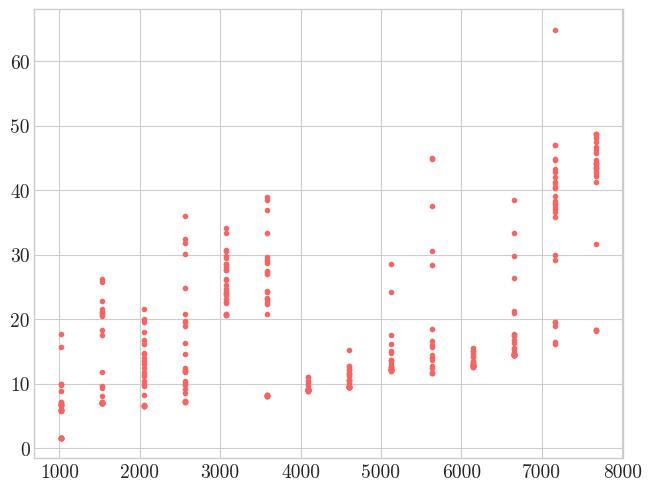

In [6]:
plt.plot(output_data.grid_size,output_data.Elapsed_time,'.')

14
[  2   4   8  12  18  24  32  40  50  60  72  84  98 112] [ 1.72594077  1.58820504  3.27830757  4.14897042  3.8319613   6.8287491
 20.84128254 22.53121286 22.83885458 13.83888193 31.54461332 31.54331531
 15.59261094 14.84136798] [0.31788935 0.9498185  1.24291973 2.42221413 0.55825997 3.23057098
 0.68100691 2.11147428 3.3105736  8.16605822 1.92291196 4.64969709
 6.66234057 3.30156696]


/home/jovyan/work/HPPC/HPPC_repo/Assignment_5_shallow_water/Code/../../Assignment_4_Inverse_problems/Code/myfuncs.py:276: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(*dim,figsize=size,**kwargs)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 282.3                      │              Nfcn = 31               │
│ EDM = 2.35e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.390   │   0.015   │            │            │         │         │       │
│ 1 │ b    │   0.91    │   0.29    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 0.000213 -2.49e-3 │
│ b │ -2.49e-3   0.0844 │
└───┴───────────────────┘

14
[  2   4   8  12  18  24  32  40  50  60  72  84  98 112] [ 1.52985355  1.75878427  4.47779537  4.99531833  4.28454938  6.2391873
 19.91109448 22.07403983 22.10520923 17.51552502 31.76994205 27.94792568
 16.6561326  16.55929312] [0.65600269 0.88616604 1.52289199 3.12338124 0.59532949 3.34961934
 1.63323361 2.86591387 2.75833232 9.25976019 2.42376914 8.09447432
 3.90810528 3.77709104]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 110.4                      │              Nfcn = 31               │
│ EDM = 2.35e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.297   │   0.019   │            │            │         │         │       │
│ 1 │ b    │    0.8    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 0.000369  -5.5e-3 │
│ b │  -5.5e-3    0.207 │
└───┴───────────────────┘

14
[  2   4   8  12  18  24  32  40  50  60  72  84  98 112] [ 1.41655456  1.99293977  4.20374539  4.54275554  4.17842669  6.6481537
 20.0439227  21.78913695 18.34267777 21.6105161  32.10438319 23.35455461
 14.98984816 17.38520271] [ 0.6428644   1.05524249  1.46617927  2.32063332  0.66007969  3.48037399
  1.50606295  3.92013314  6.85921294 10.67796865  1.9666241  10.13981595
  3.23975089  5.12546776]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 113.5                      │              Nfcn = 31               │
│ EDM = 2.98e-24 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.311   │   0.019   │            │            │         │         │       │
│ 1 │ b    │    0.8    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 0.000373  -5.6e-3 │
│ b │  -5.6e-3    0.221 │
└───┴───────────────────┘

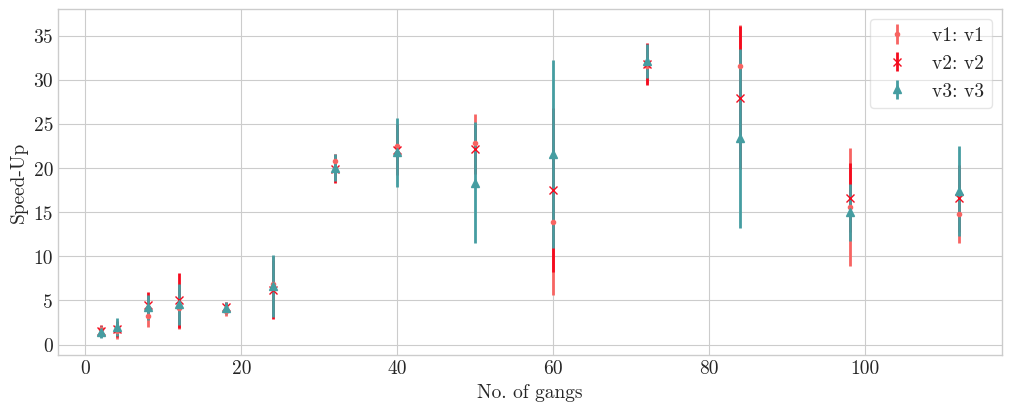

In [10]:
def lin_least_sq(x,y,err):
    return lambda a,b: np.sum((a*x+b-y)**2/err**2)

fig, ax = my.standard_plot()

markers = [".","x","^"]
changes = ["v1", "v2", "v3"]
for i in range(3):
    version = i+1
    vmask = output_data["Version"] == version
    data = output_data[vmask]
    time = output_data["Elapsed_time"][vmask]
    size = np.sort(list(set(output_data["grid_size"][vmask])))

    gangs = np.sort(list(set(data.N_gangs)))
    print(len(size))
    data_t= np.zeros(len(size))
    data_err = np.zeros(len(size))
    for j in range(len(size)):
        data_t[j] = np.mean(data.Elapsed_time[data.grid_size==size[j]])
        data_err[j] =np.std(data.Elapsed_time[data.grid_size==size[j]],ddof=1)
        
    
    #speed_up = (time.min() / nfreq.min() )  / (time / nfreq )
    #lt[0] = 1
    min_time = time[data.grid_size==size[0]].min()
    speed_up = (min_time )  / (data_t) * gangs
    speed_err= speed_up*data_err/data_t
    x,y,err = gangs,speed_up,speed_err
    print(x,y,err)
    min = Minuit(lin_least_sq(x,y,err), a= 0.5,b=0)
    display(min.migrad())
    
    ax.errorbar(gangs,
            speed_up,yerr = speed_err, fmt = markers[i], label=f"v{int(version)}: {changes[i]}")

ax.set(xlabel="No. of gangs", ylabel="Speed-Up")
ax.legend() 

save(fig, "weak_scaling_corrected.pdf")

/home/jovyan/work/HPPC/HPPC_repo/Assignment_4_Inverse_problems/Code/myfuncs.py:276: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(*dim,figsize=size,**kwargs)


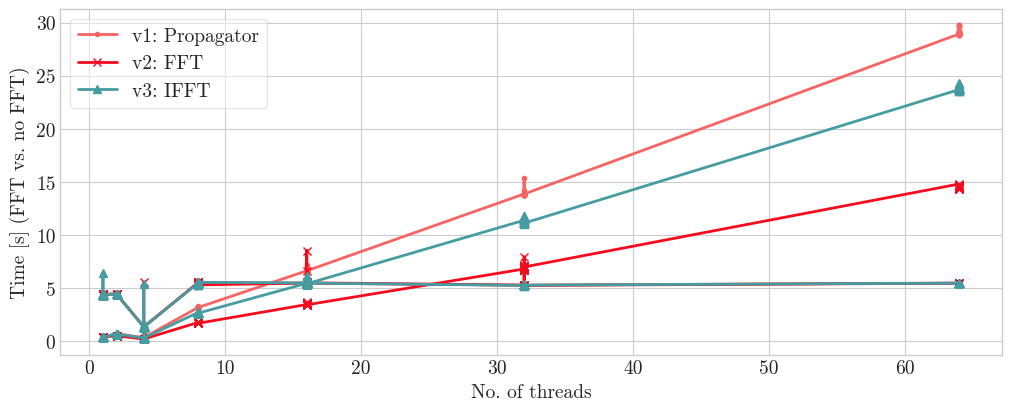

In [54]:
fig, ax = my.standard_plot()

markers = [".","x","^"]
changes = ["Propagator", "FFT", "IFFT"]
for i in range(3):
    version = i+1
    vmask = output_data["version"] == version
    data = output_data.where(vmask).sort_values(by=["nthreads"])
    time = data["t_total"]
    nthreads = data["nthreads"]
    fft, = ax.plot(nthreads,data["t_fft"],
           markers[i],ls="-", label=f"v{int(version)}: {changes[i]}")
    ax.plot(nthreads,data["t_no_fft"],
            markers[i],ls="-", color = fft.get_color())

ax.set(xlabel="No. of threads", ylabel="Time [s] (FFT vs. no FFT)")
ax.legend() 

save(fig, "FFT_scaling.pdf")
